# Projekt z programowania w języku python

Autor: Michał Koziński

Tematem projektu będzie pobranie, przygotowanie, przedstawienie i opis danych, a w końcowym rezultacie zbudowanie modelu liniowego. 

W tym celu pozyskam dane ze strony *Yahoo Finance* z których odczytam indeksowane wartości giełdowe poszczególnych dóbr.

Wczytywanie pakietów potrzebnych do późniejszych operacji.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.formula.api as smf
import scipy.stats as st
import seaborn as sns

## Pobieranie i oczyszczanie danych

Wczytywanie danych z *Yahoo Finance* za pomocą pakietu *yfinance* z okresu 01.01.2021 - 01.01.2022 do zbudowania modelu predykcyjnego.

In [4]:
crude = yf.download(tickers='CL=F', start = '2021-01-01', end = '2022-01-01')
brent = yf.download(tickers='BZ=F', start = '2021-01-01', end = '2022-01-01')
wheat = yf.download(tickers='ZW=F', start = '2021-01-01', end = '2022-01-01')
gold = yf.download(tickers='GC=F', start = '2021-01-01', end = '2022-01-01')
silver = yf.download(tickers='SI=F', start = '2021-01-01', end = '2022-01-01')
sugar  = yf.download(tickers='SB=F', start = '2021-01-01', end = '2022-01-01')
copper = yf.download(tickers='HG=F', start = '2021-01-01', end = '2022-01-01')
nat_gas = yf.download(tickers='NG=F', start = '2021-01-01', end = '2022-01-01')
water = yf.download(tickers='H2O=F', start = '2021-01-01', end = '2022-01-01')
aluminium = yf.download(tickers='ALI=F', start = '2021-01-01', end = '2022-01-01')
coffe = yf.download(tickers='KC=F', start = '2021-01-01', end = '2022-01-01')
corn = yf.download(tickers='ZC=F', start = '2021-01-01', end = '2022-01-01')
gasoline = yf.download(tickers='RB=F', start = '2021-01-01', end = '2022-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Wyświetlenie pierwszych wierszy wraz ze strukturą pobranych danych.

In [51]:
gasoline.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-31,1.4078,1.4238,1.3966,1.4084,1.4084,60206
2021-01-04,1.4085,1.4516,1.3620,1.3729,1.3729,71981
2021-01-05,1.3660,1.4586,1.3618,1.4521,1.4521,74245
2021-01-06,1.4439,1.4931,1.4404,1.4750,1.4750,68827
2021-01-07,1.4703,1.4879,1.4641,1.4827,1.4827,53441


Do modelu użyję wartości z kolumny "Close".

Za pomocą biblioteki *Pandas* tworzę ramkę danych z wartości w kolumnach *Close* dla poszczególnych dóbr.

In [5]:
dane=pd.DataFrame({'ropa':crude.Close,
                   'brent':brent.Close,
                   'paliwo':gasoline.Close,
                   'zloto':gold.Close,
                   'srebro':silver.Close,
                   'miedz':copper.Close,
                   'aluminium':aluminium.Close,
                   'gaz_ziemny':nat_gas.Close,
                   'woda':water.Close,
                   'cukier':sugar.Close,
                   'kawa':coffe.Close,
                   'pszenica':wheat.Close,
                   'kukurydza':corn.Close})

Dla podglądu wyświetlam pierwsze 10 wersów ramki danych.

In [58]:
dane.head(10)

,ropa,brent,paliwo,zloto,srebro,miedz,aluminium,gaz_ziemny,woda,cukier,kawa,pszenica,kukurydza
Date,,,,,,,,,,,,,
2020-12-31,48.520000,NaN,1.4084,1893.099976,26.332001,3.5140,1990.00,2.539,496.0,15.490000,128.250000,640.50,484.00
2021-01-04,47.619999,51.090000,1.3729,1944.699951,27.284000,3.5530,2023.25,2.581,505.0,15.760000,126.150002,642.00,483.75
2021-01-05,49.930000,53.599998,1.4521,1952.699951,27.570999,3.6405,2050.00,2.702,501.0,16.120001,125.099998,654.00,491.75
2021-01-06,50.630001,54.299999,1.4750,1906.900024,26.973000,3.6500,2038.00,2.716,504.0,16.250000,120.900002,647.50,495.00
2021-01-07,50.830002,54.380001,1.4827,1912.300049,27.200001,3.6955,2039.25,2.729,504.0,15.600000,121.099998,642.25,494.00
2021-01-08,52.240002,55.990002,1.5423,1834.099976,24.582001,3.6735,2022.25,2.700,504.0,15.600000,123.699997,638.75,496.25
2021-01-11,52.250000,55.660000,1.5208,1849.599976,25.239000,3.5640,2000.75,2.747,498.0,15.670000,121.449997,634.75,492.25
2021-01-12,53.209999,56.580002,1.5530,1842.900024,25.384001,3.6050,2015.50,2.753,498.0,15.460000,121.400002,665.00,517.25
2021-01-13,52.910000,56.060001,1.5488,1853.599976,25.520000,3.6170,2007.50,2.727,499.0,15.840000,125.250000,660.50,524.50


Jak widać wartości nie były indeksowane każdego dnia.

Ze względu na zauważone braki, zliczam ile z nich występuje dla każdego dobra.

In [61]:
[sum(np.isnan(dane.ropa)),
 sum(np.isnan(dane.brent)),
 sum(np.isnan(dane.paliwo)),
 sum(np.isnan(dane.zloto)),
 sum(np.isnan(dane.srebro)),
 sum(np.isnan(dane.miedz)),
 sum(np.isnan(dane.aluminium)),
 sum(np.isnan(dane.gaz_ziemny)),
 sum(np.isnan(dane.woda)),
 sum(np.isnan(dane.cukier)),
 sum(np.isnan(dane.kawa)),
 sum(np.isnan(dane.pszenica)),
 sum(np.isnan(dane.kukurydza))]

[0, 2, 0, 0, 1, 0, 1, 0, 26, 0, 0, 1, 1]

Niekwestionowanym liderem w ilości braków danych jest *woda*, która w porównaniu do innych dóbr ma aż 26.

Wyświetlam zatem w których wierszach występują braki dla *wody*

In [62]:
np.where(np.isnan(dane.woda))

(array([204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216,
        217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229],
       dtype=int64),)

Sprawdzam ile zindeksowanych wartości ma *paliwo*. Ze względu na niewystępujące dla tego dobra braki danych, będę mógł sprawdzić w ilu dniach spośród 366 wartości zostały zindeksowane.

In [63]:
len(dane.paliwo)

254

Wartości dla dóbr bez braków danych zostały zindeksowane 254 razy.

Jak można się doyśleć wartości dla *wody* zostałe zindeksowane 26 razy mniej. Przy tak dużej różnicy braków danych, można założyć, że dni z brakami dla *wody* obejmą większość dni z brakami dla pozostałych dóbr. Przy usuwaniu braków danych, można spodziewać straty od 26 do 32 indeksów.

Stwierdzam, że zawężenie zbioru danych o taką liczbę dni, nie wpłynie w znaczący sposób na końcowy rezultat, więc pozbywam się wszytkich wierszy, gdzie występują braki danych.

In [6]:
df = dane.dropna()

Jeszcze raz sprawdzam ile zindeksowanych wartości pozostało, aby upewnić się czy usunięcie braków danych nie uszczupliło za bardzo zbioru.

In [65]:
len(df.paliwo)

226

Usunięcie braków danych poskutkowało usunieciem danych z 28 dni.

## Przedstawienie i opis pozyskanych danych

In [66]:
df.head()

,ropa,brent,paliwo,zloto,srebro,miedz,aluminium,gaz_ziemny,woda,cukier,kawa,pszenica,kukurydza
Date,,,,,,,,,,,,,
2021-01-04,47.619999,51.090000,1.3729,1944.699951,27.284000,3.5530,2023.25,2.581,505.0,15.760000,126.150002,642.00,483.75
2021-01-05,49.930000,53.599998,1.4521,1952.699951,27.570999,3.6405,2050.00,2.702,501.0,16.120001,125.099998,654.00,491.75
2021-01-06,50.630001,54.299999,1.4750,1906.900024,26.973000,3.6500,2038.00,2.716,504.0,16.250000,120.900002,647.50,495.00
2021-01-07,50.830002,54.380001,1.4827,1912.300049,27.200001,3.6955,2039.25,2.729,504.0,15.600000,121.099998,642.25,494.00
2021-01-08,52.240002,55.990002,1.5423,1834.099976,24.582001,3.6735,2022.25,2.700,504.0,15.600000,123.699997,638.75,496.25


Pozyskane we wcześniej opisywanym procesie dane prezentują się w powyższy sposób. 

Są one zindeksowanymi wartościami dóbr takich jak: ropa, brent (ropa pozyskana z Morza Północnego), paliwo, złoto, srebro, aluminium, gaz ziemny, woda, cukier, kawa, pszenica, kukurydza.

Wyświetlę teraz statystyki odpisowe zebranych danych.

In [145]:
df.describe(include='all')

,ropa,brent,paliwo,zloto,srebro,miedz,aluminium,gaz_ziemny,woda,cukier,kawa,pszenica,kukurydza
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000
mean,66.726637,69.685310,2.072720,1795.603981,25.227973,4.232204,2478.620575,3.556712,774.263009,17.668982,163.821460,691.700221,583.039823
std,7.384079,7.149457,0.235499,50.460590,1.845723,0.293330,295.509451,0.931408,154.301452,1.494628,35.683909,51.254404,64.532154
min,47.619999,51.090000,1.372900,1677.699951,21.459000,3.539000,1929.500000,2.446000,497.000000,14.710000,120.900002,601.750000,483.750000
25%,61.552500,65.332500,1.971175,1763.300049,23.675000,4.117000,2248.750000,2.777000,683.500000,16.422500,130.062504,650.000000,539.312500
50%,67.355000,69.774998,2.130750,1790.149963,25.517500,4.278000,2500.250000,3.252000,852.500000,17.530001,153.975006,681.125000,557.875000
75%,72.030003,74.412498,2.229100,1824.175049,26.409501,4.388875,2617.562500,4.039750,898.500000,18.980000,189.375000,726.875000,623.437500
max,83.870003,85.820000,2.508400,1952.699951,29.398001,4.778500,3202.500000,6.312000,956.000000,20.330000,250.199997,814.750000,772.750000


In [185]:
print('Mediany wartości poszczególnych dóbr')
print(df.median())

print('Skośność dla poszczególnych dóbr')
print(df.skew())

Mediany wartości poszczególnych dóbr
ropa            67.355000
brent           69.774998
paliwo           2.130750
zloto         1790.149963
srebro          25.517500
miedz            4.278000
aluminium     2500.250000
gaz_ziemny       3.252000
woda           852.500000
cukier          17.530001
kawa           153.975006
pszenica       681.125000
kukurydza      557.875000
dtype: float64
Mediany wartości poszczególnych dóbr
ropa         -0.240660
brent        -0.260381
paliwo       -1.026203
zloto         0.483195
srebro       -0.161737
miedz        -0.657610
aluminium     0.188756
gaz_ziemny    0.903349
woda         -0.710489
cukier        0.021032
kawa          0.645516
pszenica      0.477676
kukurydza     0.997061
dtype: float64


Spośród wszystkich dóbr wyłaniają się 2 dobra, które szczególnie warto ze sobą porównać. Mianowicie są to *ropa* i *brent*, które przedstawiają ceny ropy naftowej.

Jak widać ropa wydobywana na Morzu Północnym jest droższa od ogólnego indeksu ropy naftowej.

W celu zobrazowania różnic wyświtelę wykresy pudełkowe ich cen. 

Text(0, 0.5, '')

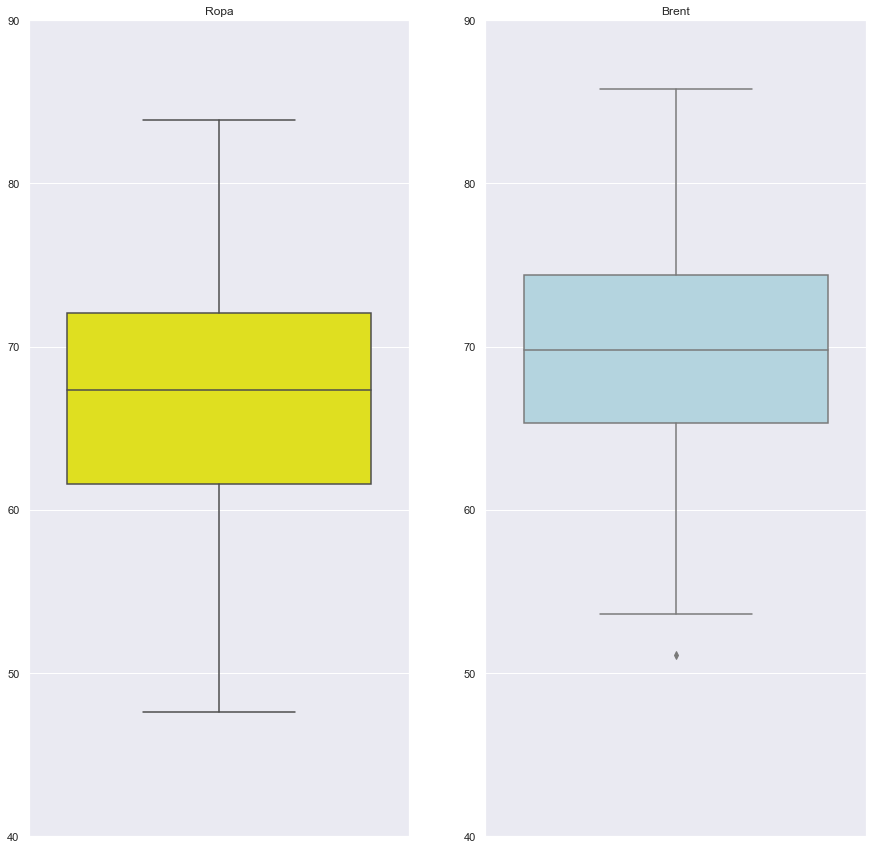

In [144]:
fig = plt.figure(figsize=(15,15), facecolor='white')
sns.set(style='darkgrid')

fig.add_subplot(1,2,1)
sns.boxplot(y=df.ropa, color='yellow')
plt.title('Ropa')
plt.ylim(40, 90)
plt.ylabel('')

fig.add_subplot(1,2,2)
sns.boxplot(y=df.brent, color='lightblue')
plt.title('Brent')
plt.ylim(40, 90)
plt.ylabel('')

Jak widać wykresy pokrywają się z wcześniejszymi obserwacjami, ponadto można zaobserwować, że ceny *brentu* charakteryzują się delikatnie mniejszą wariancją.

Wykonam teraz przedstawienie danych dla *ropy* w szeregu rozdzielczym.

In [236]:
klasy = np.linspace(min(df.ropa), max(df.ropa), 14)
ds = (pd.value_counts(pd.cut(df.ropa, klasy))).sort_values()
x = np.array(ds.index.categories).astype('str')

<BarContainer object of 13 artists>

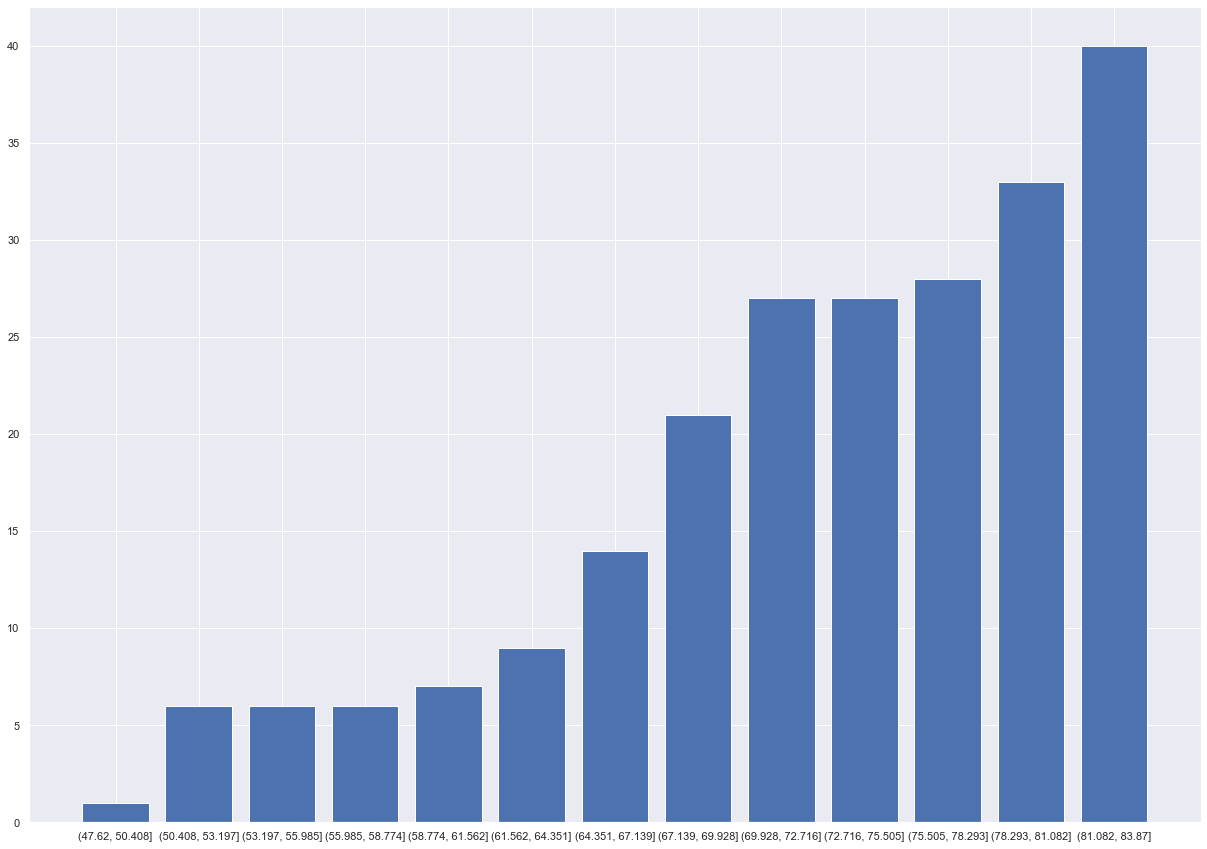

In [237]:
f = plt.figure()
f.set_figwidth(21)
f.set_figheight(15)

plt.bar(x,ds.values)

Wyświetlę też boxploty wartości innych dóbr, dla zobrazwoania tego jak się rozkładają.

Text(0, 0.5, '')

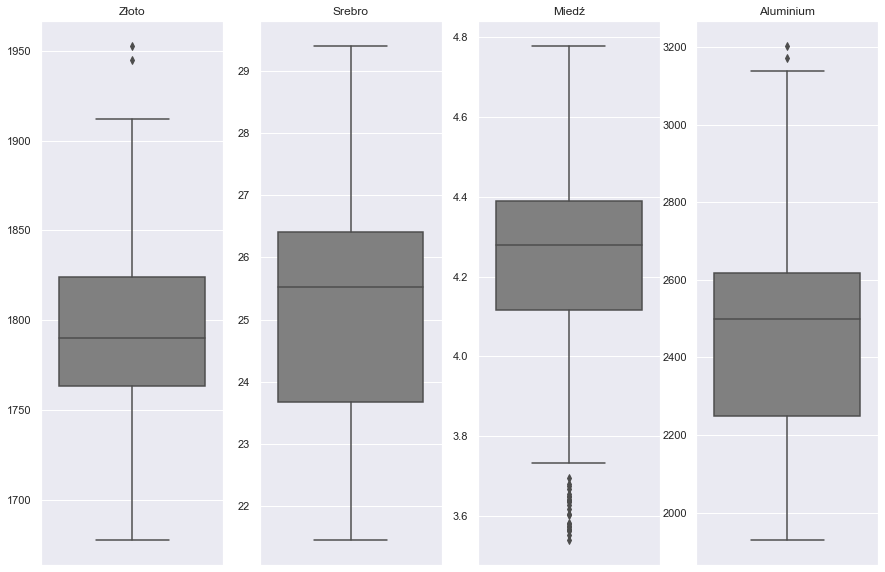

In [143]:
fig2 = plt.figure(figsize=(15,10), facecolor='white')
sns.set(style='darkgrid')

fig2.add_subplot(1,4,1)
sns.boxplot(y=df.zloto, color='grey')
plt.title('Złoto')
plt.ylabel('')

fig2.add_subplot(1,4,2)
sns.boxplot(y=df.srebro, color='grey')
plt.title('Srebro')
plt.ylabel('')

fig2.add_subplot(1,4,3)
sns.boxplot(y=df.miedz, color='grey')
plt.title('Miedź')
plt.ylabel('')

fig2.add_subplot(1,4,4)
sns.boxplot(y=df.aluminium, color='grey')
plt.title('Aluminium')
plt.ylabel('')

Sprawdzę teraz jak czy wartości *paliwa* mają rozkład normalny.

Na początku narysuję 3 wykresy dzieki kótrym będzie mozna zobaczyć, czy rozkład cen pokrywa się, czy odbiega od rozkładu normalnego.

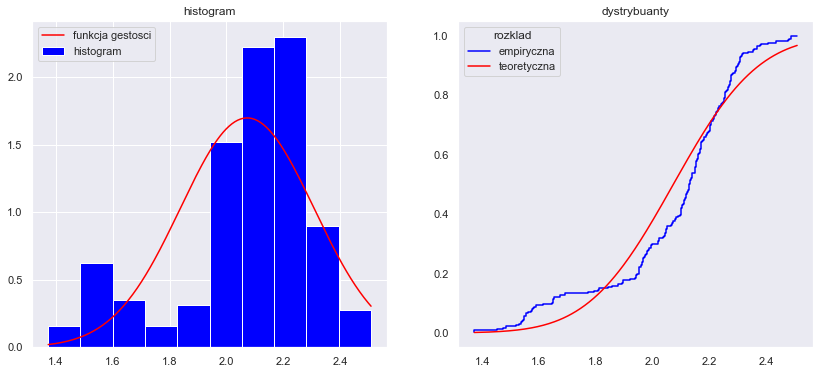

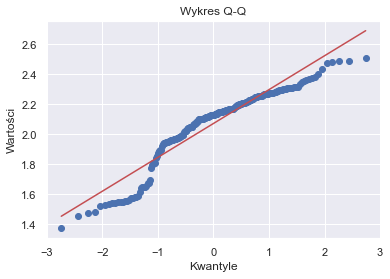

In [265]:
from statsmodels.distributions.empirical_distribution import ECDF

dist_norm = st.norm.fit(df.paliwo)
x = np.linspace(min(df.paliwo), max(df.paliwo), 226)

fig, ax = plt.subplots(1,2,facecolor='white',figsize=(14,6))

ax[0].hist(df.paliwo,density=True, color='blue', label='histogram')
ax[0].plot(x, st.norm(loc = dist_norm[0], scale = dist_norm[1]).pdf(x), color='red', label='funkcja gestosci')
ax[0].legend()
ax[0].set_title('histogram')

ecdf=ECDF(df.paliwo)
ax[1].step(ecdf.x, ecdf.y, color='blue', label='empiryczna')
ax[1].plot(x,st.norm(loc=dist_norm[0], scale=dist_norm[1]).cdf(x), color='red', label = 'teoretyczna')
ax[1].legend(title='rozklad')
ax[1].grid()
ax[1].set_title('dystrybuanty')

plt.show()

st.probplot(df.paliwo, dist=st.norm, plot=plt)
plt.title('Wykres Q-Q')
plt.xlabel('Kwantyle')
plt.ylabel('Wartości')
plt.show()

Jak widać rozkład cen *paliwa* nie pokrywa się z rozkładem normalnym.

Dla pewności przeprowadzę jeszcze test Szapiro-Wilka.
Oczywiście hipotezą zerową jest, że rozkład zmiennej *paliwo* ma rozkład normalny, a hipotezą alternatywną, że zmienna nie ma rozkładu normalnego.

In [183]:
shapiro_test = st.shapiro(df.paliwo)
shapiro_test

ShapiroResult(statistic=0.9033753275871277, pvalue=6.631251103783598e-11)

Przy tak niskim p-value nie ma żadnych wątpliwości, że należy odrzucić hipotezę zerową na rzecz hipotezy alternatywnej.

## Tworzenie modelu liniowego

W celu doboru zmiennych do stworzenia modelu liniwego posłużę się macierzą korelacji, żeby móc wstepnie ocenić, czy wartości poszczególnych dóbr są ze sobą skorelowane. 

Jako zmienną objaśnianą wybrałem cenę *paliwa*. 

Dla przejrzystości podzielę dane na dwie części i stworzę 2 oodzielne macierze, w obu z nich zawarta będzie zmienna *paliwo*.

<Figure size 432x288 with 0 Axes>

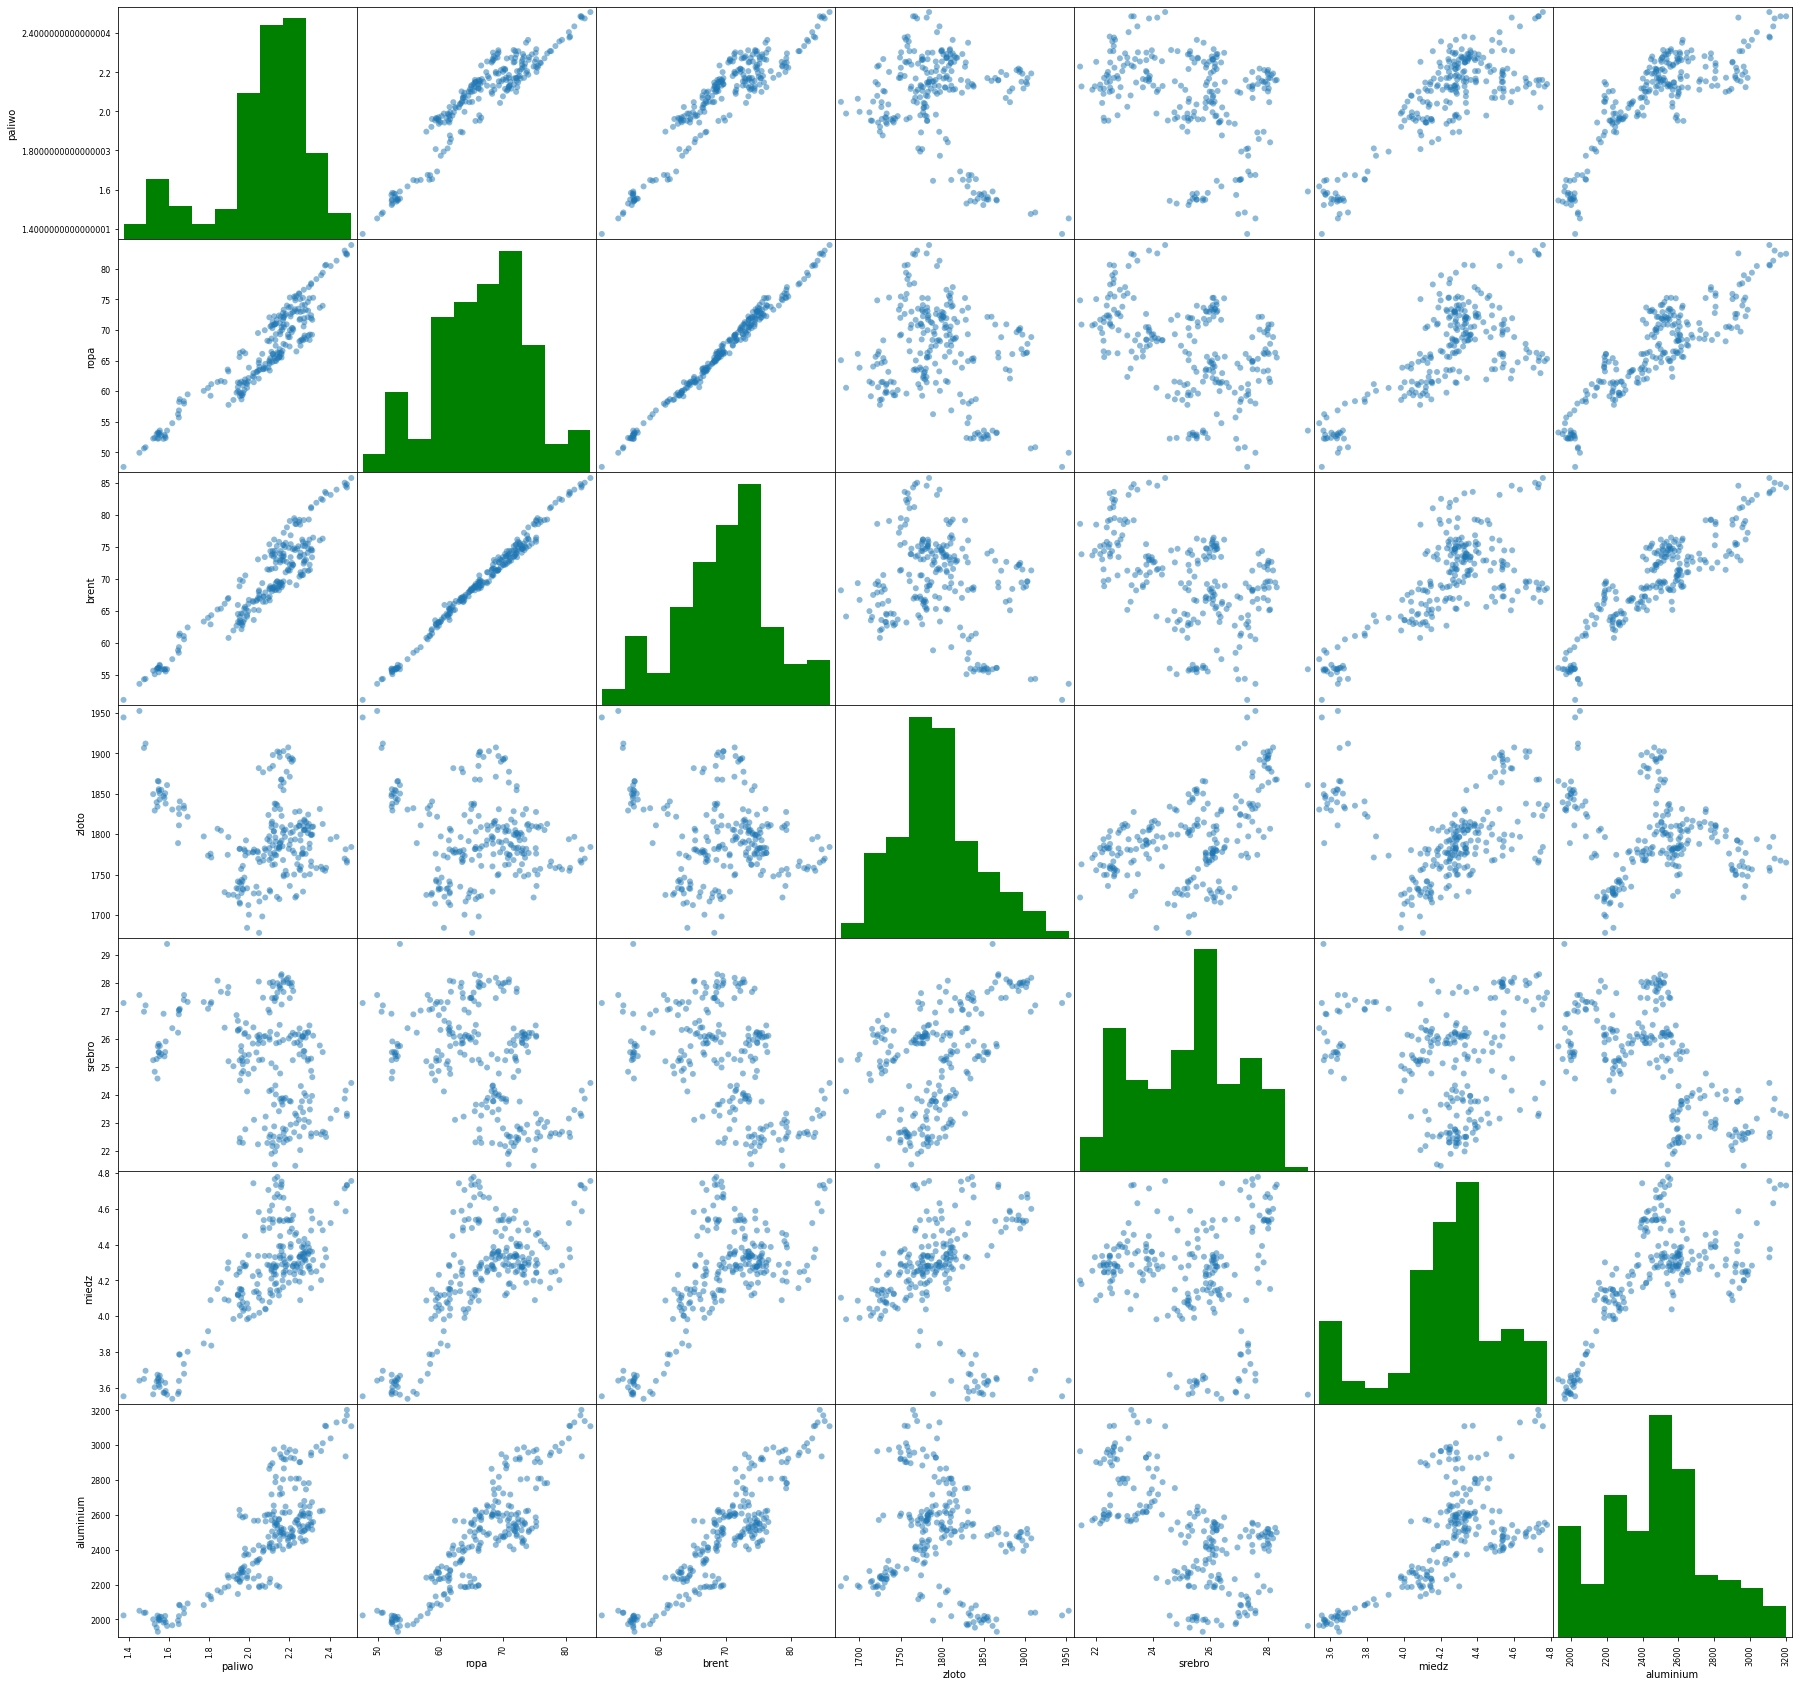

In [7]:
plt.figure(facecolor='white')
pd.plotting.scatter_matrix(df.iloc[:,[2,0,1,3,4,5,6]], marker='o', figsize=(30,30), diagonal='hist', 
                                                              hist_kwds={'bins': 10,
                                                                        'color': 'green'})
plt.show()

<Figure size 432x288 with 0 Axes>

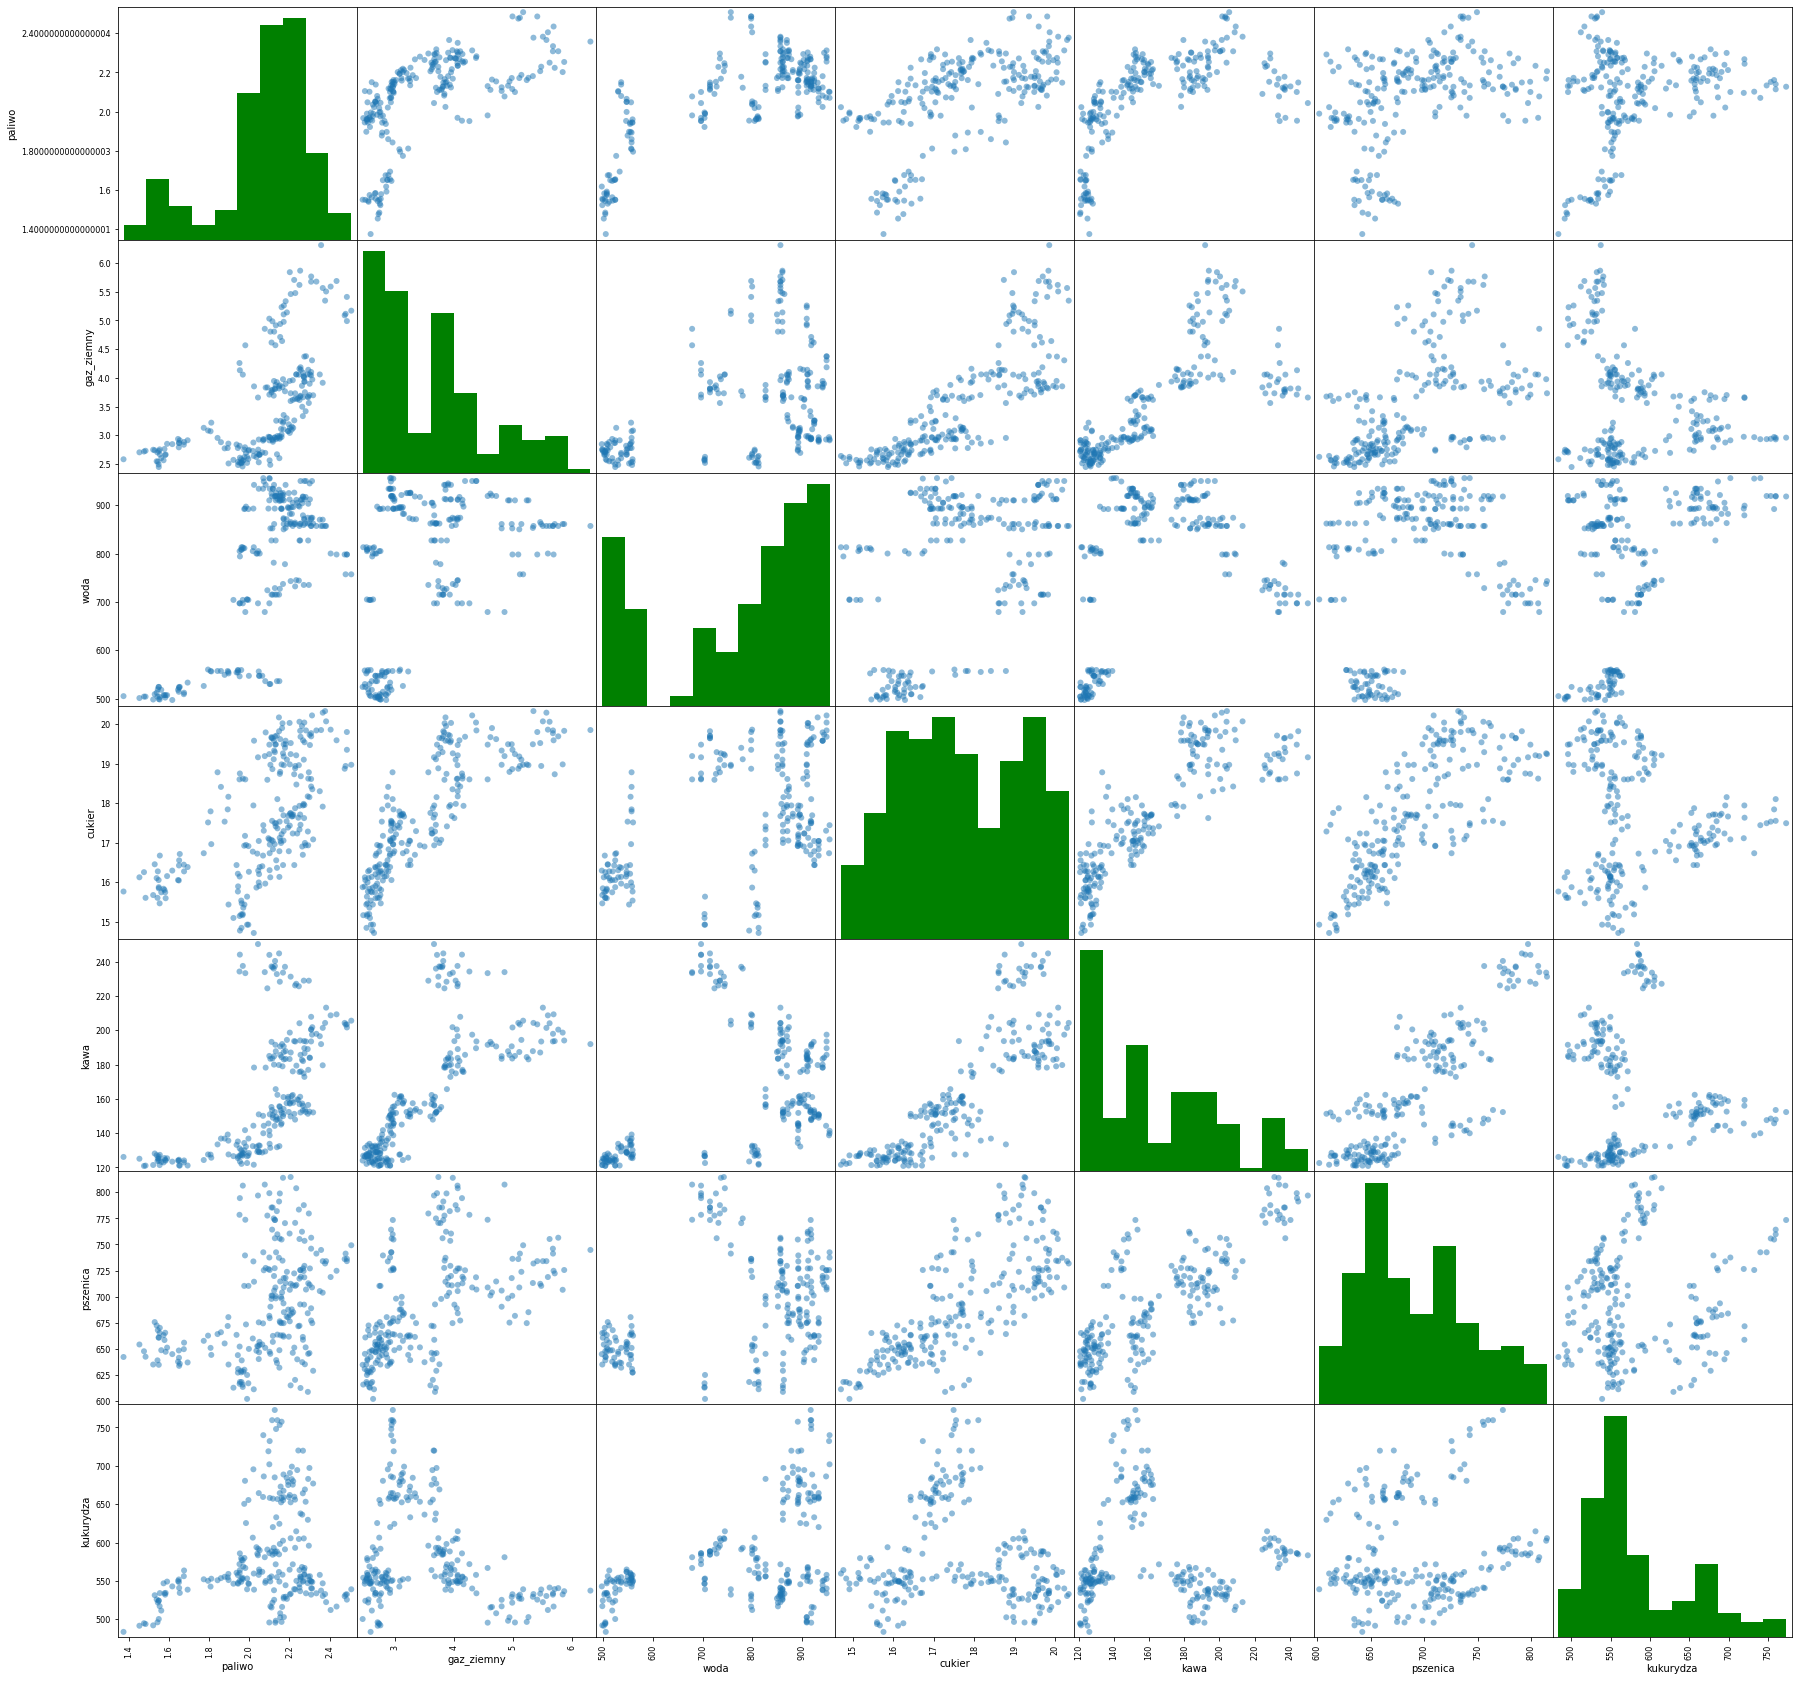

In [8]:
plt.figure(facecolor='white')
pd.plotting.scatter_matrix(df.iloc[:,[2,7,8,9,10,11,12]], marker='o', figsize=(30,30), diagonal='hist', 
                                                              hist_kwds={'bins': 10,
                                                                        'color': 'green'})
plt.show()

Na podstawie macierzy widać, że najbardziej skorelowane z ceną *paliwa* są wartości *ropy* i *brentu*.

<Figure size 432x288 with 0 Axes>

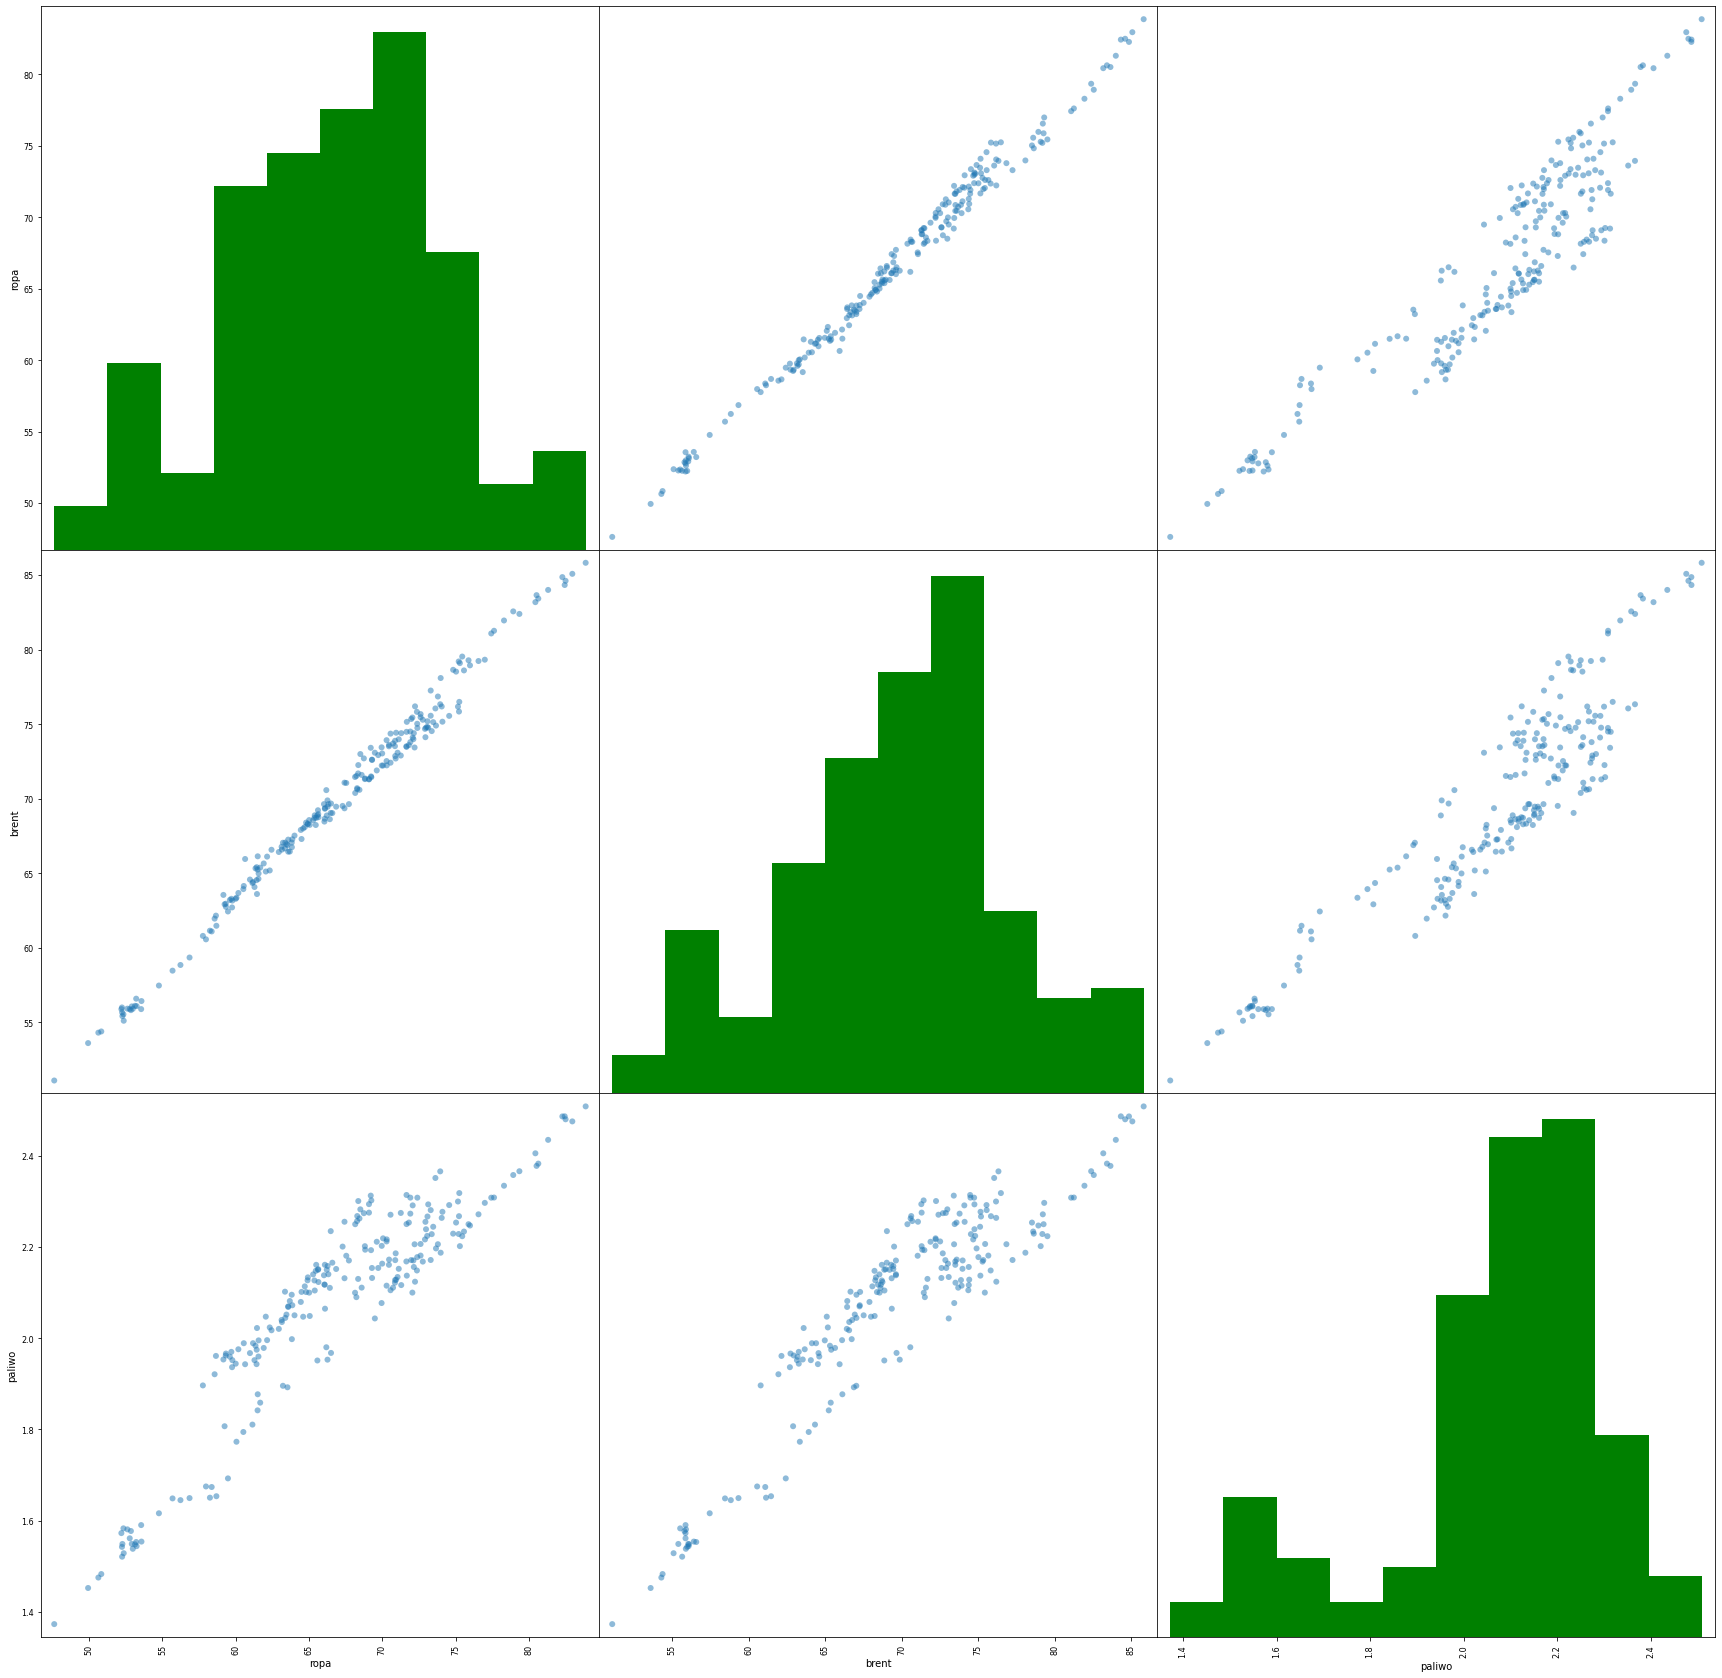

In [9]:
plt.figure(facecolor='white')
pd.plotting.scatter_matrix(df.iloc[:,0:3], marker='o', figsize=(30,30), diagonal='hist', 
                                                              hist_kwds={'bins': 10,
                                                                        'color': 'green'})
plt.show()

W pierwszym modelu do objaśniania ceny *paliwa* posłużę się wartością *ropy*.

In [166]:
regresja = smf.ols(formula = 'paliwo ~ ropa', data = df)
wynik = regresja.fit()
wynik.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 paliwo   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1340.
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           1.75e-96
Time:                        23:16:10   Log-Likelihood:                 226.20
No. Observations:                 226   AIC:                            -448.4
Df Residuals:                     224   BIC:                            -441.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1029      0.054      1.901      0.059      -0.004       0.210
ropa           0.0295      0.001     36.602      0.000       0.028       0.031
==============================================================================
Omnibus:                      201.589   Durbin-Watson:                   0.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.788
Skew:                           0.039   Prob(JB):                     0.000373
Kurtosis:                       1.708   Cond. No.                         612.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model prezentował by się w następujący sposób:

$paliwo = 0.03 * ropa + ε$

Wartość $0.1$ w rozkładzie jest statystycznie nieistotna.

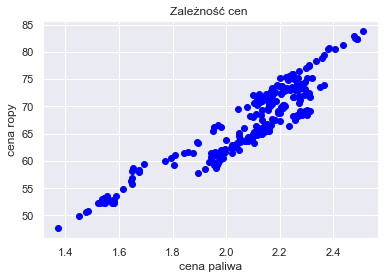

In [239]:
plt.plot(df.paliwo, df.ropa, linestyle='', marker='o', color='blue')
#plt.plot(df.paliwo, wynik.predict(df.paliwo), linestyle='solid', color='red')
plt.xlabel('cena paliwa')
plt.ylabel('cena ropy')
plt.title('Zależność cen ')
plt.show()

Narysuję również histogram reszt, by zobaczyć, jak się rozkładają.

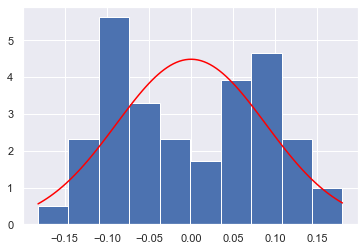

In [177]:
reszty = wynik.resid
x = np.linspace(min(reszty), max(reszty), 100)

plt.hist(reszty, density = True)
plt.plot(x, st.norm.pdf(x, loc = np.mean(reszty), scale = np.std(reszty)), color = 'red')
plt.show()

Jak widać reszty nie mają rozkładu normalnego. Ich rozkład cechuje się dwumodalnością.

Wykonam teraz model liniowy, do wykonania którego posłużę się wszystkimi posiadanymi zmiennymi.

In [248]:
regresja = smf.ols(formula = 'paliwo ~ ropa + brent + zloto + srebro + miedz + aluminium + gaz_ziemny + woda + cukier + kawa + pszenica + kukurydza', data = df)
wynik = regresja.fit()
print(wynik.summary())

                            OLS Regression Results                            
Dep. Variable:                 paliwo   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     546.9
Date:                Wed, 22 Jun 2022   Prob (F-statistic):          1.06e-152
Time:                        19:46:06   Log-Likelihood:                 397.58
No. Observations:                 226   AIC:                            -769.2
Df Residuals:                     213   BIC:                            -724.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8410      0.155      5.432      0.0

Jak widać wartości *brentu*, *srebra*, *cukru*, *kawy*, *pszenicy* nie są istotnie różne od zera, a więc można usunąć je z modelu.

W końcowym efekcie model wyglądał by w następujący sposób:
    
$paliwo = 0,841 + 0,0343 * ropa - 0.0006 * złoto + 0.2514 * miedź - 0.0001 * aluminium - 0.0383 * gaz ziemny + 0.0005 * woda - 0.0007 * kukurydza$

Co ciekawe, według modelu najsilniej skorelowana z wartością *paliwa* jest wartość *miedzi*, nawet bardziej niż wartość *ropy*.
Może to wynikać z tego, że cena ropy w znaczym stopniu warunkuje koszt pozyskiwania, bądź obróbki *miedzi*.

## Testowanie modelu

Teraz dokonam testowania modelu na danych z początku obecnego roku (od 1 styczna 2022 do 1 czerwca 2022)

W tym celu ze strony *Yahoo finance* pobiorę dane z tego okresu i w analogiczny sposób jak poprzednio przygotuję do użytku.

In [251]:
gasoline_wyk = yf.download(tickers='RB=F', start = '2022-01-01', end = '2022-06-01')
crude_t = yf.download(tickers='CL=F', start = '2022-01-01', end = '2022-06-01')
brent_t = yf.download(tickers='BZ=F', start = '2022-01-01', end = '2022-06-01')
wheat_t = yf.download(tickers='ZW=F', start = '2022-01-01', end = '2022-06-01')
gold_t = yf.download(tickers='GC=F', start = '2022-01-01', end = '2022-06-01')
silver_t = yf.download(tickers='SI=F', start = '2022-01-01', end = '2022-06-01')
sugar_t  = yf.download(tickers='SB=F', start = '2022-01-01', end = '2022-06-01')
copper_t = yf.download(tickers='HG=F', start = '2022-01-01', end = '2022-06-01')
nat_gas_t = yf.download(tickers='NG=F', start = '2022-01-01', end = '2022-06-01')
water_t = yf.download(tickers='H2O=F', start = '2022-01-01', end = '2022-06-01')
aluminium_t = yf.download(tickers='ALI=F', start = '2022-01-01', end = '2022-06-01')
coffe_t = yf.download(tickers='KC=F', start = '2022-01-01', end = '2022-06-01')
corn_t = yf.download(tickers='ZC=F', start = '2022-01-01', end = '2022-06-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [253]:
dane2=pd.DataFrame({'ropa':crude_t.Close,
                   'brent':brent_t.Close,
                   'zloto':gold_t.Close,
                   'srebro':silver_t.Close,
                   'miedz':copper_t.Close,
                   'aluminium':aluminium_t.Close,
                   'gaz_ziemny':nat_gas_t.Close,
                   'woda':water_t.Close,
                   'cukier':sugar_t.Close,
                   'kawa':coffe_t.Close,
                   'pszenica':wheat_t.Close,
                   'kukurydza':corn_t.Close})

In [254]:
df2 = dane2.dropna()

In [255]:
paliwo_p = wynik.predict(df2)

In [268]:
df_p = pd.DataFrame({'faktyczna':gasoline_wyk.Close,
                    'oczekiwana':paliwo_p})

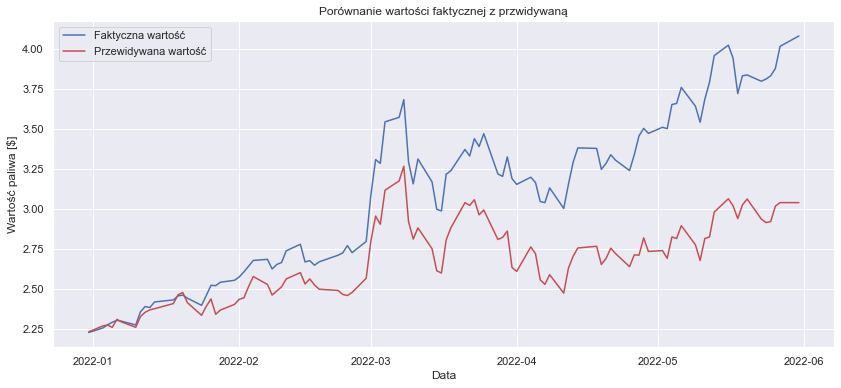

In [287]:
plt.rcParams["figure.figsize"] = (14,6)
plt.plot(df_p.faktyczna, "b-", label="Faktyczna wartość")
plt.plot(df_p.oczekiwana, "r", label="Przewidywana wartość")
plt.legend(loc="best")
plt.xlabel("Data")
plt.ylabel("Wartość paliwa [$]")
plt.title("Porównanie wartości faktycznej z przwidywaną")
plt.show()

Jak widać z czasem wartości przewidywane "rozjeżdżają się", mimo to oba wykresy zachowują podobny kształt, co widać na przykładzie dużego skoku wartości paliwa na przełomie lutego i marca, a także jej spadku na początku kwietnia.